In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\results.csv")

In [31]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [32]:
df['Year'] = df['date'].apply(lambda x: int(str.split(x,"-")[0]))

In [33]:
rank = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\fifa_ranking-2021-05-27.csv")

In [34]:
rank.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43818,82,Iraq,IRQ,15,0,0,AFC,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


In [35]:
rank['rYear'] = rank['rank_date'].apply(lambda x: int(str.split(x,'-')[0]))

In [36]:
cr = rank.groupby(['country_full','rYear']).mean().reset_index()
cr.head()

,country_full,rYear,id,rank,total_points,previous_points,rank_change
0,Afghanistan,2003,20000.0,199.000000,42.833333,37.333333,0.833333
1,Afghanistan,2004,20000.0,197.500000,62.750000,63.500000,0.333333
2,Afghanistan,2005,20000.0,198.833333,57.750000,55.416667,0.916667
3,Afghanistan,2006,20000.0,181.454545,67.363636,71.545455,2.272727
4,Afghanistan,2007,20000.0,186.250000,24.333333,26.250000,2.250000


In [37]:
def get_rankings(df,home_team,away_team, year):
    
    # to get the rankings
    rankdict = {}
    ranking_home_team = df.loc[((df['country_full'] == home_team) & (df['rYear'] == year)),'rank']
    ranking_away_team = df.loc[((df['country_full'] == away_team) & (df['rYear'] == year)),'rank']
    
    if (len(ranking_home_team) > 0) and (len(ranking_away_team) > 0):
        rankdict['ranking_home_team'] = ranking_home_team.values[0]
        rankdict['ranking_away_team'] = ranking_away_team.values[0]
    elif (len(ranking_home_team) == 0) and (len(ranking_away_team) > 0):
        rankdict['ranking_home_team'] = 0
        rankdict['ranking_away_team'] = ranking_away_team.values[0]
    elif (len(ranking_home_team) > 0) and (len(ranking_away_team) == 0):
        rankdict['ranking_home_team'] = ranking_home_team.values[0]
        rankdict['ranking_away_team'] = 0
    else:
        rankdict['ranking_home_team'] = 0
        rankdict['ranking_away_team'] = 0
    
    return rankdict

In [38]:
def getTotalPoints(df,home_team, away_team, year):
    tpdict = {}
    # tp - total points, ht - home team, at - away team
    tp_ht = df.loc[((df['country_full'] == home_team) & (df['rYear'] == year)),'total_points']
    tp_at = df.loc[((df['country_full'] == away_team) & (df['rYear'] == year)),'total_points']
    
    if (len(tp_ht) > 0) and (len(tp_at) > 0):
        tpdict['tp_home_team'] = tp_ht.values[0]
        tpdict['tp_away_team'] = tp_at.values[0]
    elif (len(tp_ht) == 0) and (len(tp_at) > 0):
        tpdict['tp_home_team'] = 0
        tpdict['tp_away_team'] = tp_at.values[0]
    elif (len(tp_ht) > 0) and (len(tp_at) == 0):
        tpdict['tp_home_team'] = tp_ht.values[0]
        tpdict['tp_away_team'] = 0
    else:
        tpdict['tp_home_team'] = 0
        tpdict['tp_away_team'] = 0
    
    return tpdict
    

In [39]:
def getTotalGameCount(home_team, away_team, year):
    # dictionary to add total count (tc - total count)
    tcdict = {}
    year_ = int(year)-1
    tc_ht =  dfCountHT.loc[((dfCountHT['home_team'] == home_team) & (dfCountHT['Year'] == year_)),'Count']
    tc_at =  dfCountAT.loc[((dfCountAT['away_team'] == away_team) & (dfCountAT['Year'] == year_)),'Count']
    
        
    if (len(tc_ht) > 0) and (len(tc_at) > 0):
        tcdict['tc_home_team'] = tc_ht.values[0]
        tcdict['tc_away_team'] = tc_at.values[0]
    elif (len(tc_ht) == 0) and (len(tc_at) > 0):
        tcdict['tc_home_team'] = 0
        tcdict['tc_away_team'] = tc_at.values[0]
    elif (len(tc_ht) > 0) and (len(tc_at) == 0):
        tcdict['tc_home_team'] = tc_ht.values[0]
        tcdict['tc_away_team'] = 0
    else:
        tcdict['tc_home_team'] = 0
        tcdict['tc_away_team'] = 0
    
    return tcdict
    

In [40]:
df_ = df.loc[df.Year >= 1992].reset_index()

In [41]:
# get a column with value one (to get a count of number of matches each country played in a specific year)
df_.insert(0,'Count',1)
dfCountHT = df_.groupby(['home_team','Year']).sum().reset_index()
dfCountAT = df_.groupby(['away_team','Year']).sum().reset_index()

In [42]:
dfCountHT.drop(['index','home_score','away_score','neutral'], axis = 1, inplace = True)
dfCountAT.drop(['index','home_score','away_score','neutral'], axis = 1, inplace = True)

In [43]:
dfCountAT.head()

,away_team,Year,Count
0,Abkhazia,2012,1
1,Abkhazia,2014,2
2,Abkhazia,2017,4
3,Abkhazia,2018,1
4,Abkhazia,2019,2


In [44]:
wl = []
for index,row in df_.iterrows():
    alldict = {}
    
    year = row['Year']
    home_team = row['home_team']
    away_team = row['away_team']
    
    print("executing ranking function.........................")
    
    rankings = get_rankings(cr,home_team,away_team,year)
    ts = getTotalPoints(cr,home_team,away_team,year)
    tc = getTotalGameCount(home_team, away_team, year)
    #print("ranking dictionary ",rankings)
    alldict['home_team'] = row['home_team']
    alldict['away_team'] = row['away_team']
    #alldict['Goals'] = row['WonGoals']
    alldict['home_goals'] = row['home_score']
    alldict['away_goals'] = row['away_score']
    alldict['Ranking_home_team'] = rankings['ranking_home_team']
    alldict['Ranking_away_team'] = rankings['ranking_away_team']
    alldict['Total_Score_home_team'] = ts['tp_home_team']
    alldict['Total_Score_away_team'] = ts['tp_away_team']
    alldict['Total_count_home_team'] = tc['tc_home_team']
    alldict['Total_count_away_team'] = tc['tc_away_team']
    alldict['Year'] = row['Year']
    alldict['tournament'] = row['tournament']
    #print(alldict)
    wl.append(alldict)
    df1 = pd.DataFrame(wl)
    
    #print(year,month,home_team,away_team) 

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

In [45]:
df1.head()

,home_team,away_team,home_goals,away_goals,Ranking_home_team,Ranking_away_team,Total_Score_home_team,Total_Score_away_team,Total_count_home_team,Total_count_away_team,Year,tournament
0,Egypt,Czechoslovakia,2,0,21.0,18.0,45.0,47.0,0,0,1992,Friendly
1,DR Congo,Ivory Coast,2,0,0.0,0.0,0.0,0.0,0,0,1992,Friendly
2,Guyana,Barbados,0,2,128.0,114.0,4.0,7.0,0,0,1992,Friendly
3,Egypt,Norway,0,0,21.0,14.0,45.0,49.0,0,0,1992,Friendly
4,Cameroon,Morocco,1,0,22.0,41.0,43.0,32.0,0,0,1992,African Cup of Nations


In [46]:
df1['HomeTeamRank_Difference'] = df1['Ranking_home_team'] - df1['Ranking_away_team']
df1['AwayTeamRank_Difference'] = df1['Ranking_away_team'] - df1['Ranking_home_team']

In [47]:
#df1.to_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\teamrank_GP_Poisson_1.csv")

In [2]:
#df1 = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\teamrank_GP_Poisson_1.csv")

In [49]:
goal_model_data = pd.concat([df1[['home_team','away_team','home_goals','Total_Score_home_team',
                                       'Total_count_home_team','HomeTeamRank_Difference','tournament']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_goals':'goals',
                     'Total_Score_home_team':'total_score','Total_count_home_team':'total_count','HomeTeamRank_Difference':'rank_difference','tournament':'tournament'}),
           df1[['away_team','home_team','away_goals','Total_Score_away_team','Total_count_away_team',
                     'AwayTeamRank_Difference']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_goals':'goals',
                    'Total_Score_away_team':'total_score','Total_count_away_team':'total_count',
                     'AwayTeamRank_Difference':'rank_difference','tournament':'tournament'})])

In [50]:
goal_model_data.head()

,team,opponent,goals,total_score,total_count,rank_difference,tournament,home
0,Egypt,Czechoslovakia,2,45.0,0,3.0,Friendly,1
1,DR Congo,Ivory Coast,2,0.0,0,0.0,Friendly,1
2,Guyana,Barbados,0,4.0,0,14.0,Friendly,1
3,Egypt,Norway,0,45.0,0,7.0,Friendly,1
4,Cameroon,Morocco,1,43.0,0,-19.0,African Cup of Nations,1


In [7]:
goal_model_data.goals.mean()

1.3743916432556482

In [8]:
goal_model_data.goals.var()

2.4431894854691962

In [5]:
goal_model_data.shape

(50546, 7)

In [6]:
goal_model_data_train = goal_model_data[:35390]

In [129]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent+total_score+total_count+rank_difference", data=goal_model_data_train, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                35390
Model:                            GLM   Df Residuals:                    34790
Model Family:                 Poisson   Df Model:                          599
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51210.
Date:                Sun, 15 Aug 2021   Deviance:                       40100.
Time:                        09:37:25   Pearson chi2:                 3.64e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.1617      0.349     -0.463      0.643      -0.846       0.523
team[T.Afghanistan]                             -0.3408      0.280     -1.216      0.224      -0.890       0.208
team[T.Albania]                                  0.6002      0.251      2.388      0.017       0.108       1.093
team[T.Alderney]                                -1.2833      0.437     -2.937      0.003      -2.140      -0.427
team[T.Algeria]                                  0.6979      0.247      2.826      0.005       0.214       1.182
team[T.American Samoa]                          -1.2739      0.319     -3.998      0.000      -1.898      -0.649
team[T.Andalusia]                                0.9893      0.325      3.045      0.002       0.353       1.626
team[T.Andorra]                                 -0.4144      0.291     -1.425      0.154      -0.985       0.156
team[T.Angola]                                   0.5091      0.249      2.044      0.041       0.021       0.997
team[T.Anguilla]                                -1.2055      0.314     -3.842      0.000      -1.820      -0.591
team[T.Antigua and Barbuda]                     -0.0010      0.254     -0.004      0.997      -0.499       0.497
team[T.Arameans Suryoye]                         0.3501      0.494      0.709      0.478      -0.618       1.318
team[T.Argentina]                                1.2531      0.245      5.114      0.000       0.773       1.733
team[T.Armenia]                                  0.6019      0.254      2.374      0.018       0.105       1.099
team[T.Artsakh]                                  0.0413      0.366      0.113      0.910      -0.676       0.758
team[T.Aruba]                                   -0.1091      0.276     -0.395      0.693      -0.651       0.432
team[T.Australia]                                0.8595      0.244      3.522      0.000       0.381       1.338
team[T.Austria]                                  0.9755      0.247      3.951      0.000       0.492       1.459
team[T.Azerbaijan]                               0.2578      0.256      1.006      0.314      -0.244       0.760
team[T.Bahamas]                                 -0.5419      0.298     -1.819      0.069      -1.126       0.042
team[T.Bahrain]                                  0.5476      0.246      2.224      0.026       0.065       1.030
team[T.Bangladesh]                              -0.5838      0.259     -2.255      0.024      -1.091      -0.076
team[T.Barawa]                                  -0.6465      0.334     -1.938      0.053      -1.300       0.007
team[T.Barbados]                                 0.0011      0.254      0.004      0.996      -0.497       0.499
team[T.Basque Country]          

In [130]:
poisson_model_2 = smf.glm(formula="goals ~ total_score+total_count+rank_difference", data=goal_model_data_train, 
                        family=sm.families.Poisson()).fit()
poisson_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                35390
Model:                            GLM   Df Residuals:                    35386
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57617.
Date:                Sun, 15 Aug 2021   Deviance:                       52914.
Time:                        09:39:22   Pearson chi2:                 5.92e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3034      0.008     36.976      0.000       0.287       0.320
total_score         0.0001   1.13e-05     11.635      0.000       0.000       0.000
total_count        -0.0030      0.001     -2.302      0.021      -0.006      -0.000
rank_difference    -0.0053   7.01e-05    -76.286      0.000      -0.005      -0.005
===================================================================================
"""

In [136]:
 poisson_model_2.predict(round(goal_model_data[35390:35400]))

10117    1.717578
10118    2.715246
10119    2.086450
10120    1.148893
10121    2.104416
10122    0.978897
10123    1.874990
10124    2.981755
10125    1.511645
10126    1.556631
dtype: float64

In [137]:
goal_model_data[35390:35400]

,team,opponent,goals,total_score,total_count,rank_difference,home
10117,Nigeria,Zimbabwe,3,681.000000,4,-29.583333,0
10118,Romania,Andorra,5,651.416667,5,-117.166667,0
10119,Finland,Armenia,2,591.750000,10,-72.416667,0
10120,Azerbaijan,Austria,0,409.250000,5,37.916667,0
10121,Spain,Bosnia and Herzegovina,1,785.583333,5,-65.500000,0
10122,Canada,Costa Rica,0,480.000000,8,67.833333,0
10123,Jamaica,El Salvador,3,568.666667,9,-51.583333,0
10124,France,Faroe Islands,2,812.416667,4,-129.666667,0
10125,Albania,Georgia,0,486.916667,6,-11.666667,0
10126,Brazil,Germany,1,843.583333,10,-10.833333,0


In [51]:
from sklearn.model_selection import train_test_split
goal_model_data_FIFA = goal_model_data.loc[goal_model_data.tournament == "FIFA World Cup"].reset_index()
X_train, X_test = train_test_split(goal_model_data_FIFA, test_size=0.33, random_state=42)

In [10]:
poisson_model_3= smf.glm(formula="goals ~ total_score+total_count+rank_difference", data=X_train, 
                        family=sm.families.Poisson()).fit()
poisson_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                33865
Model:                            GLM   Df Residuals:                    33861
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53080.
Date:                Sun, 15 Aug 2021   Deviance:                       49821.
Time:                        15:19:30   Pearson chi2:                 5.50e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2311      0.009     25.300      0.000       0.213       0.249
total_score         0.0001   1.14e-05      9.096      0.000    8.11e-05       0.000
total_count        -0.0040      0.001     -2.738      0.006      -0.007      -0.001
rank_difference    -0.0053   7.31e-05    -72.196      0.000      -0.005      -0.005
===================================================================================
"""

In [13]:
ratio = poisson_model_3.pearson_chi2/poisson_model_3.df_resid
print(ratio)
# there is over dispersion present in the model as ratio > 1

1.6252010782202948


In [15]:
modelOD = smf.glm(formula="goals ~ total_score+total_count+rank_difference", data=X_train, 
                        family=sm.families.NegativeBinomial(alpha = 1)).fit()
modelOD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                33865
Model:                            GLM   Df Residuals:                    33861
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53483.
Date:                Sun, 15 Aug 2021   Deviance:                       25012.
Time:                        15:22:26   Pearson chi2:                 2.48e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2620      0.014     18.652      0.000       0.234       0.290
total_score      7.299e-05   1.84e-05      3.976      0.000     3.7e-05       0.000
total_count        -0.0076      0.002     -3.280      0.001      -0.012      -0.003
rank_difference    -0.0052      0.000    -43.990      0.000      -0.005      -0.005
===================================================================================
"""

In [16]:
#predicted = poisson_model_3.predict(round(X_test))
modelOD.predict(round(X_test))

13295    3.075217
12630    1.302958
24866    1.402955
8429     1.129982
6412     0.858474
           ...   
15421    1.178152
6294     3.117311
22776    1.492008
11500    0.903860
14921    0.966831
Length: 16681, dtype: float64

In [145]:
predicteddf = pd.DataFrame(predicted, columns = ['Pre'])
#predicteddf.to_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\poisson predict 1.csv")

In [24]:
#X_test.to_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\poisson actual 1.csv")

In [52]:
poisson_model_4= smf.glm(formula="goals ~ rank_difference", data=X_train, 
                        family=sm.families.Poisson()).fit()
poisson_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  292
Model:                            GLM   Df Residuals:                      290
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -432.73
Date:                Sun, 15 Aug 2021   Deviance:                       325.84
Time:                        18:03:59   Pearson chi2:                     293.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2806      0.053      5.286      0.000       0.177       0.385
rank_difference    -0.0127      0.002     -5.579      0.000      -0.017      -0.008
===================================================================================
"""

In [53]:
ratio = poisson_model_4.pearson_chi2/poisson_model_4.df_resid
print(ratio)

1.0120170063983331


In [54]:
X_train['predicted'] = poisson_model_4.fittedvalues

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


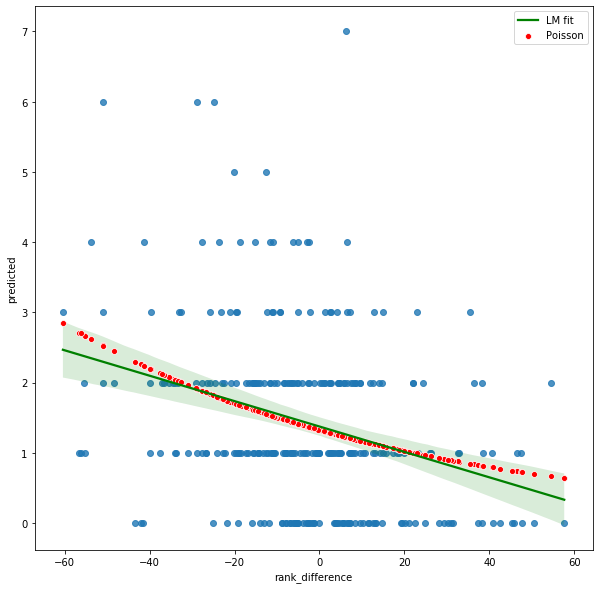

In [55]:
plt.subplots(figsize = (10,10))
sns.regplot('rank_difference','goals',data =X_train, fit_reg= True ,
           line_kws = {'color':'green',
                      'label': 'LM fit'})
sns.scatterplot('rank_difference','predicted',data = X_train, color = 'red', label = 'Poisson')

In [63]:
predicted4 = poisson_model_4.predict(round(X_test))
#predicted4.values

In [58]:
X_test.goals.values

array([2, 5, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 2, 3, 1, 0, 1, 2, 1, 2, 0, 0, 3, 4, 0, 1, 1, 0, 1, 2, 3, 5,
       2, 1, 1, 0, 0, 4, 1, 1, 0, 2, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1, 1, 0,
       0, 0, 1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 0, 3, 2,
       0, 2, 6, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 8,
       3, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 3, 3, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 3, 1, 3, 4], dtype=int64)

In [99]:
(poisson_model_4.predict(pd.DataFrame(data = {'rank_difference': 134.333333},index = [1])).values[0])

0.24132450180951776

In [101]:
round(poisson_model_4.predict(pd.DataFrame(data = {'rank_difference': -134.333333},index = [1])).values[0])

7.0

In [102]:
def getPrediction(model,home_team,away_team,ht_rd,at_rd):
    predictdict = {}
    home_team_goals = round(model.predict(pd.DataFrame(data = {'rank_difference': ht_rd},index = [1])).values[0])
    away_team_goals = round(model.predict(pd.DataFrame(data = {'rank_difference': at_rd},index = [1])).values[0])

    if home_team_goals > away_team_goals:
        #predictdict['pred_result'] = '1-0'
        predictdict['home_team_pred'] = 1
        predictdict['away_team_pred'] = 0
    elif home_team_goals < away_team_goals:
        #predictdict['pred_result'] = '0-1'
        predictdict['home_team_pred'] = 0
        predictdict['away_team_pred'] = 1
    else:
        #predictdict['pred_result'] = '0.5-0.5'
        predictdict['home_team_pred'] = 0.5
        predictdict['away_team_pred'] = 0.5
    return predictdict

In [84]:
getPrediction(poisson_model_4,'Liechtenstein','Iceland',134.333333,-134.333333)

{'home_team_pred': 0, 'away_team_pred': 1}

In [123]:
dftest = df1[300:500]
dftest.head()

,home_team,away_team,home_goals,away_goals,Ranking_home_team,Ranking_away_team,Total_Score_home_team,Total_Score_away_team,Total_count_home_team,Total_count_away_team,Year,tournament,HomeTeamRank_Difference,AwayTeamRank_Difference
300,Lesotho,Kenya,2,2,142.0,76.0,2.0,17.0,0,0,1992,African Cup of Nations qualification,66.0,-66.0
301,Panama,Costa Rica,1,0,120.0,37.0,5.0,35.0,0,0,1992,FIFA World Cup qualification,83.0,-83.0
302,Senegal,Togo,2,0,51.0,101.0,27.0,10.0,0,0,1992,African Cup of Nations qualification,-50.0,50.0
303,Zimbabwe,South Africa,4,1,54.0,124.0,27.0,5.0,0,0,1992,African Cup of Nations qualification,-70.0,70.0
304,Ethiopia,Iraq,0,13,85.0,82.0,14.0,15.0,0,0,1992,Jordan International Tournament,3.0,-3.0


In [124]:
wl_ = []
for index,row in dftest.iterrows():
    alldictpredict = {}
    
    home_team = row['home_team']
    away_team = row['away_team']
    ht_rd     = row['HomeTeamRank_Difference']
    at_rd     = row['AwayTeamRank_Difference']
    pred = getPrediction(poisson_model_4,home_team,away_team,ht_rd,at_rd)
    
    
    alldictpredict['home_team'] = row['home_team']
    alldictpredict['away_team'] = row['away_team']
    #alldict['Goals'] = row['WonGoals']
    alldictpredict['home_team_pred'] = pred['home_team_pred']
    alldictpredict['away_team_pred'] = pred['away_team_pred']
    if row['home_goals']>row['away_goals']:
        alldictpredict['home_team_actual'] = 1
        alldictpredict['away_team_actual'] = 0
    elif row['home_goals']<row['away_goals']:
        alldictpredict['home_team_actual'] = 0
        alldictpredict['away_team_actual'] = 1
    else:
        alldictpredict['home_team_actual'] = 0.5
        alldictpredict['away_team_actual'] = 0.5
    #alldictpredict['home_goals'] = row['home_goals']
    #alldictpredict['away_goals'] = row['away_goals']
    #print(alldict)
    wl_.append(alldictpredict)
    df_p = pd.DataFrame(wl_)
    
    #print(year,month,home_team,away_team) 

In [128]:
df_p

,home_team,away_team,home_team_pred,away_team_pred,home_team_actual,away_team_actual,Accuracy
0,Lesotho,Kenya,0.0,1.0,0.5,0.5,0
1,Panama,Costa Rica,0.0,1.0,1.0,0.0,0
2,Senegal,Togo,1.0,0.0,1.0,0.0,1
3,Zimbabwe,South Africa,1.0,0.0,1.0,0.0,1
4,Ethiopia,Iraq,0.5,0.5,0.0,1.0,0
...,...,...,...,...,...,...,...
195,Albania,Latvia,1.0,0.0,0.5,0.5,0
196,Bulgaria,Portugal,0.5,0.5,0.0,1.0,0
197,Greece,Hungary,0.5,0.5,0.5,0.5,1
198,Israel,Sweden,0.0,1.0,0.0,1.0,1


In [130]:
from sklearn.metrics import confusion_matrix
y_test = df_p[['home_team_actual','away_team_actual']]
y_pred = df_p[['home_team_pred','away_team_pred']]
confusion_matrix(y_true=y_test, y_pred=y_pred)

ValueError: continuous-multioutput is not supported

In [126]:
def acr(row):
    if ((row['home_team_pred']==row["home_team_actual"])&(row['away_team_pred'] == row['away_team_actual'])):
         vql = 1
    else:
         vql = 0  
    return vql
df_p['Accuracy'] = df_p.apply(acr, axis = 1)

In [127]:
df_p['Accuracy'].sum()

103

In [68]:
pd.DataFrame(data = {'rank_difference': 30},index = [1]).values[0]

array([30], dtype=int64)

In [59]:
MSE = np.square(np.subtract(X_test.goals.values,predicted4.values)).mean()
print(MSE)

1.6320286242985178


In [60]:
RMSE = MSE ** (0.5)
print(RMSE)

1.2775087570339851


In [61]:
y_wo = X_test.goals.values

In [62]:
SS_Residual = np.square(np.subtract(y_wo, predicted4.values)).sum()
SS_Total = np.square(np.subtract(y_wo,np.mean(y_wo))).sum()
r2 = 1 - (float(SS_Residual))/SS_Total
print(r2)

0.06977060050978379
